In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
%matplotlib inline

## import data

Most points in this dataset are the average of two co-located manual measurements. Measurements of SWE and density were collected using federal samplers. 

In [20]:
# upload dataframe
df = pd.read_csv('../data/fieldwork_data2022.csv')
# convert dataframe to geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf = gdf.set_crs('epsg:4326')
gdf

,date,lat,lon,elevation_m,Hs_cm,density,SWE_cm,name,geometry
0,3/14/2022,60.951084,-149.323067,1159.7640,134.60,0.289,38.9,adelie_point,POINT (-149.32307 60.95108)
1,3/14/2022,60.950831,-149.322911,1159.4592,119.40,0.288,34.4,adelie_point,POINT (-149.32291 60.95083)
2,3/14/2022,60.950281,-149.322445,1157.6304,91.40,0.327,29.9,adelie_point,POINT (-149.32244 60.95028)
3,3/14/2022,60.950308,-149.321864,1158.8496,158.80,0.367,58.3,adelie_point,POINT (-149.32186 60.95031)
4,3/14/2022,60.950715,-149.322196,1158.8496,132.10,0.362,47.8,adelie_point,POINT (-149.32220 60.95072)
...,...,...,...,...,...,...,...,...,...
90,4/14/2022,60.764148,-149.204110,619.9632,157.48,0.268,42.2,sunburst,POINT (-149.20411 60.76415)
91,4/14/2022,60.766278,-149.196275,729.0816,251.46,0.309,77.7,sunburst,POINT (-149.19628 60.76628)
92,4/14/2022,60.765456,-149.192146,875.0808,261.62,0.322,84.1,sunburst,POINT (-149.19215 60.76546)
93,4/14/2022,60.764127,-149.188501,972.0072,273.05,0.393,107.2,sunburst,POINT (-149.18850 60.76413)


In [21]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## viualize data locations 

In [12]:
# Add custom base maps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

In [23]:
m = folium.Map(tiles='Stamen terrain')
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], 
                  icon=folium.Icon(color='blue'),
                  popup="</b> Name: {0} </b> Date: {1} </b> Elevation [m]: {2} </b> Hs [cm]: {3} </b> SWE [cm]: {4} </b> Density: {5}".format(
                      row['name'], row['date'], row['elevation_m'], row['Hs_cm'], row['SWE_cm'], row['density'])
                 ).add_to(m)

# Set the map extent (bounds) to the extent of the sites
m.fit_bounds(m.get_bounds())

basemaps['Google Satellite'].add_to(m)

m

## density plots

In [87]:
# march
gdfslice = gdf[pd.to_datetime(gdf.date).dt.month==3]
#sites with elevation profiles
sites = ['tincan', 'notch','kern']


Text(0.5, 1.0, 'March 2022 field campaign')

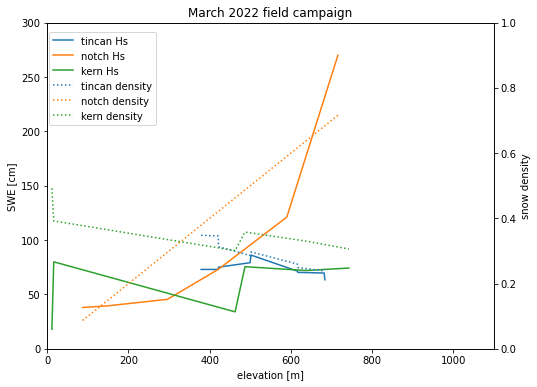

In [88]:
#plot
fig, ax = plt.subplots(figsize=[8,6])
ax1 = ax.twinx()
for site in sites:
    siteslice = gdfslice.loc[gdfslice.name==site]
    siteslice=siteslice.sort_values(by=['elevation_m'])
    if len(siteslice) > 3:
        ax.plot(siteslice.elevation_m,siteslice.SWE_cm,label = site + ' Hs')
        ax1.plot(siteslice.elevation_m,siteslice.density,linestyle=':',label = site + ' density')
        
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.87))
ax.set_xlim([0,1100])
ax.set_ylim([0,300])
ax1.set_ylim([0,1])
ax.set_xlabel('elevation [m]')
ax.set_ylabel('SWE [cm]')
ax1.set_ylabel('snow density')
ax.set_title('March 2022 field campaign')


In [81]:
# april
gdfslice = gdf[pd.to_datetime(gdf.date).dt.month==4]
sites = np.unique(gdfslice.name)


Text(0.5, 1.0, 'April 2022 field campaign')

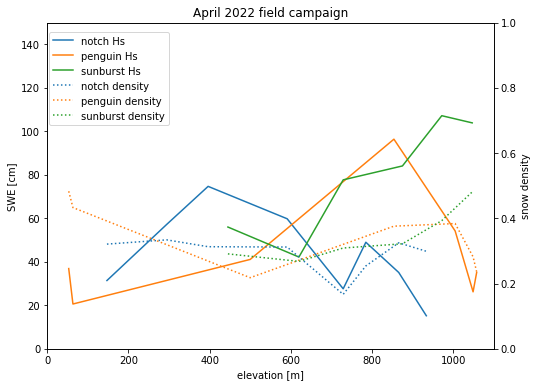

In [86]:
#plot
fig, ax = plt.subplots(figsize=[8,6])
ax1 = ax.twinx()
for site in sites:
    siteslice = gdfslice.loc[gdfslice.name==site]
    siteslice=siteslice.sort_values(by=['elevation_m'])
    if len(siteslice) > 3:
        ax.plot(siteslice.elevation_m,siteslice.SWE_cm,label = site + ' Hs')
        ax1.plot(siteslice.elevation_m,siteslice.density,linestyle=':',label = site + ' density')
        
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.87))
ax.set_xlim([0,1100])
ax.set_ylim([0,150])
ax1.set_ylim([0,1])
ax.set_xlabel('elevation [m]')
ax.set_ylabel('SWE [cm]')
ax1.set_ylabel('snow density')
ax.set_title('April 2022 field campaign')